In [1]:
import Pkg
Pkg.add(["SciMLSensitivity", "OrdinaryDiffEq", "Zygote", "Plots"])

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [2]:
using SciMLSensitivity, OrdinaryDiffEq, Zygote, LinearAlgebra, Plots

In [3]:
b = 0.5  # Bulk drag coefficient
l = 1.0  # Length of the pendulum
g = 9.81  # Gravitational acceleration

function pendulum!(du, u, p, t)
    du[1] = u[2]
    du[2] = - b*l * u[2] - (g/l) * sin(u[1])
end

pendulum! (generic function with 1 method)

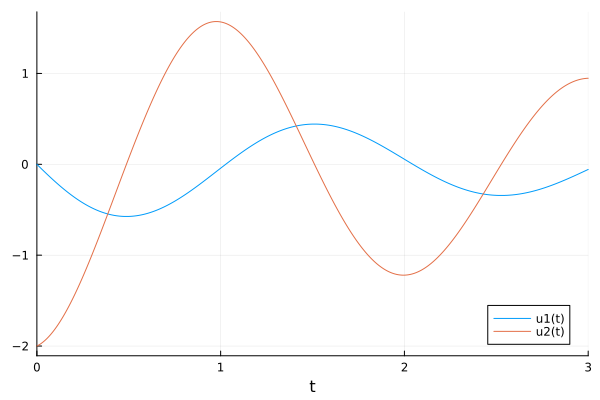

In [4]:
u0 = [0, -2]  # Initial deflection and angular velocity
tspan = [0, 3]  # Time duration of the solution 

problem = ODEProblem(pendulum!, u0, tspan)

plot(solve(problem, Tsit5(), u0=u0))

In [5]:
ut = [π, 0.0]  # Target state, i.e. upright and stopped

function loss(u0)
    solution = solve(problem, Tsit5(), u0=u0)
    return norm(last(solution) - ut)
end

loss (generic function with 1 method)

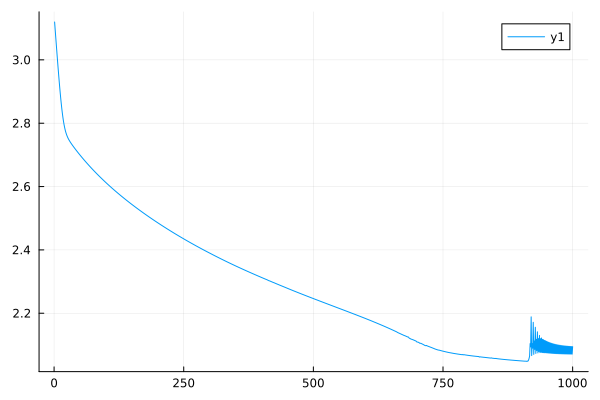

In [6]:
u0 = [0, 0]  # Initial initial condition ;)
lr = 0.1  # Gradient descent learning rate
losses = []

for i in 1:1000
    du0 = Zygote.gradient(loss, u0)[1]
    u0 -= lr * du0
    push!(losses, loss(u0))
end

plot(losses)

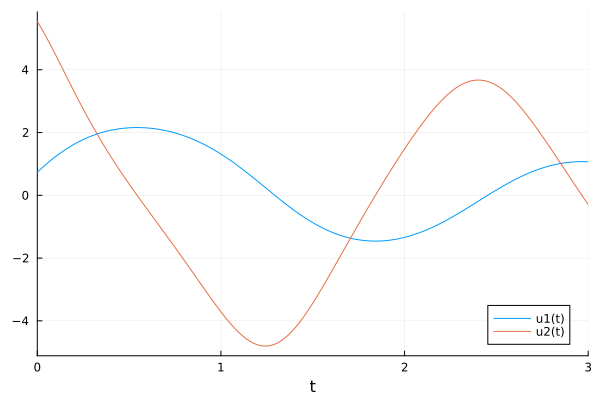

In [7]:
plot(solve(problem, Tsit5(), u0=u0))


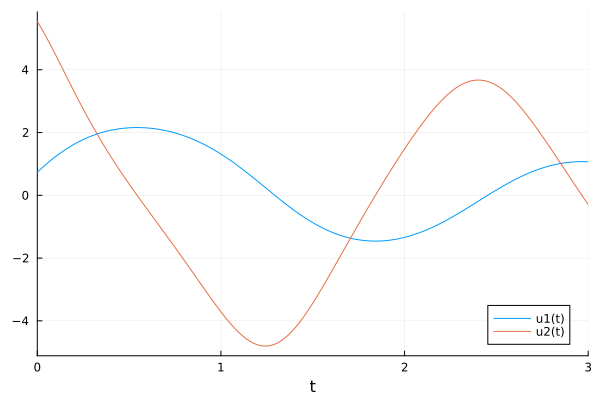

In [9]:
plot(solve(problem, Tsit5(), u0=u0))


In [10]:
last(solve(problem, Tsit5(), u0=u0))

2-element Vector{Float64}:
  1.0674055926614403
 -0.29182547215596655